# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [8]:
# Your code here - load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [6]:
# Your code here
ames = pd.read_csv('ames.csv', index_col=0)
ames.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Uti

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [7]:
# Your code here - drop columns with missing data
ames_clean = ames.dropna(axis=1)
print("data set after dropping columms:", ames_clean.shape)
print(ames_clean.head())

data set after dropping columms: (1460, 61)
    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

## Identified Predictors from Data Description
Type	Column	Description
Continuous Numeric	GrLivArea	Above grade (ground) living area in square feet
Discrete Numeric	TotRmsAbvGrd	Total rooms above ground (whole numbers only)
String Categorical	Neighborhood	Physical locations within Ames city limits
Discrete Categorical	MSSubClass	Encoded as numeric, but actually categorical dwelling types

### Continuous Numeric Predictor

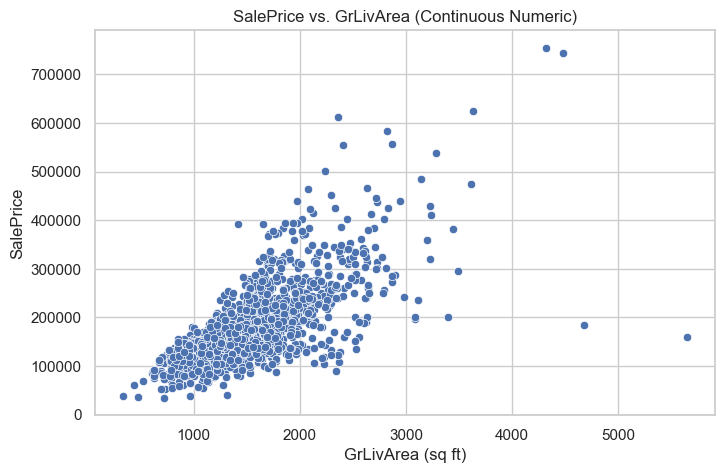

In [10]:
# Your code here - continuous numeric predictor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset just in case
ames = pd.read_csv('ames.csv', index_col=0)
ames_clean = ames.dropna(axis=1)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=ames_clean, x='GrLivArea', y='SalePrice')
plt.title('SalePrice vs. GrLivArea (Continuous Numeric)')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice')
plt.show()


### Discrete Numeric Predictor

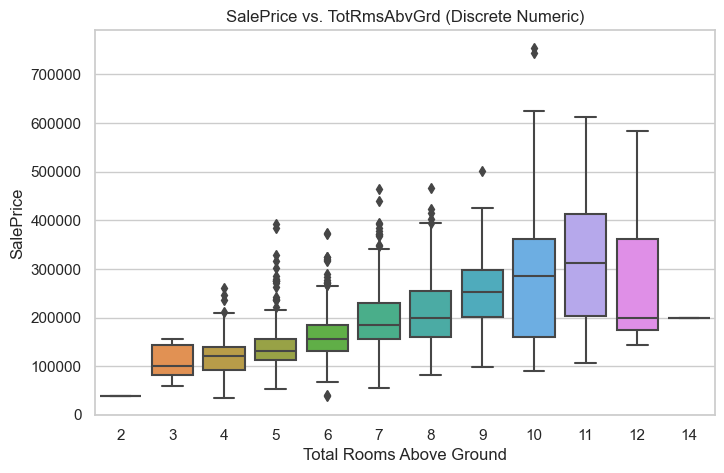

In [11]:
# Your code here - discrete numeric predictor
plt.figure(figsize=(8, 5))
sns.boxplot(data=ames_clean, x='TotRmsAbvGrd', y='SalePrice')
plt.title('SalePrice vs. TotRmsAbvGrd (Discrete Numeric)')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('SalePrice')
plt.show()


### String Categorical Predictor

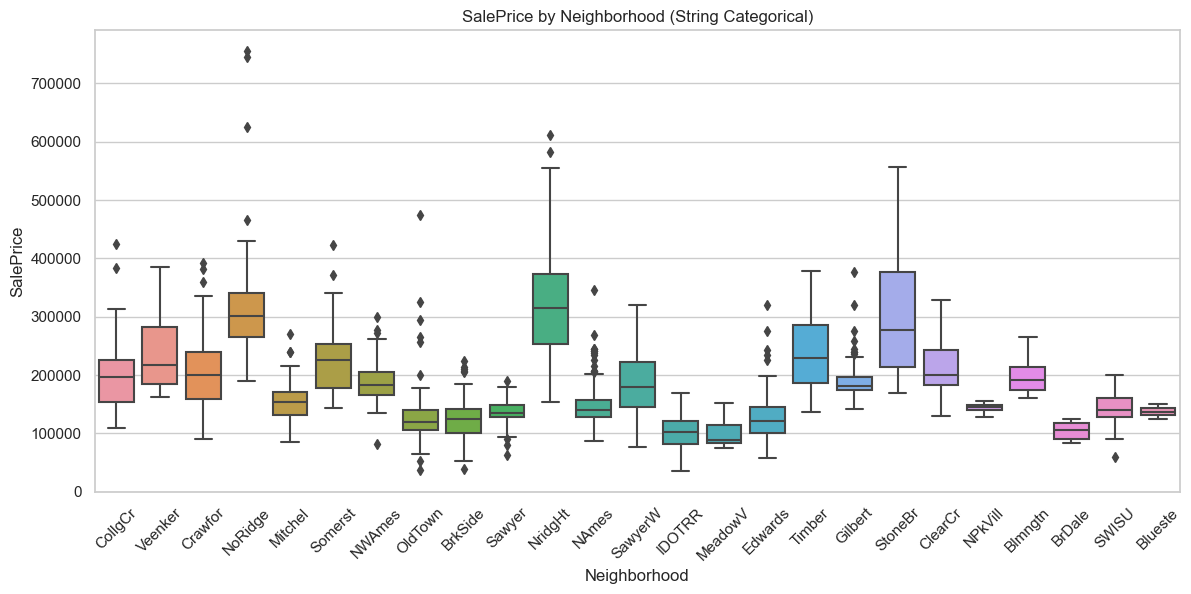

In [12]:
# Your code here - string categorical predictor
plt.figure(figsize=(14, 6))
sns.boxplot(data=ames_clean, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)
plt.title('SalePrice by Neighborhood (String Categorical)')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()



### Discrete Categorical Predictor

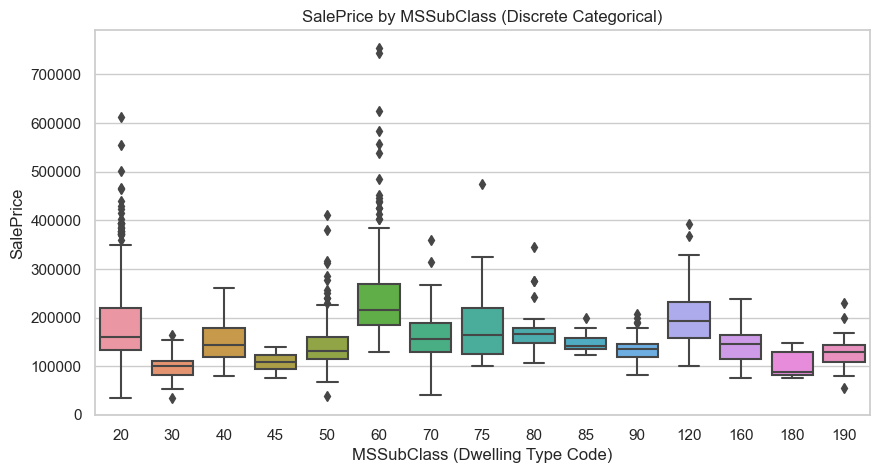

In [13]:
# Your code here - discrete categorical predictor
plt.figure(figsize=(10, 5))
sns.boxplot(data=ames_clean, x='MSSubClass', y='SalePrice')
plt.title('SalePrice by MSSubClass (Discrete Categorical)')
plt.xlabel('MSSubClass (Dwelling Type Code)')
plt.ylabel('SalePrice')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
# Your code here - prepare X and y, including one-hot encoding
# Select features and target
X = ames_clean[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = ames_clean['SalePrice']

# One-hot encode 'Neighborhood'
X_encoded = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)
X_encoded.head

<bound method NDFrame.head of       GrLivArea  TotRmsAbvGrd  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                                         
1          1710             8                 False                False   
2          1262             6                 False                False   
3          1786             6                 False                False   
4          1717             7                 False                False   
5          2198             9                 False                False   
...         ...           ...                   ...                  ...   
1456       1647             7                 False                False   
1457       2073             7                 False                False   
1458       2340             9                 False                False   
1459       1078             5                 False                False   
1460       1256             6                 False       

In [18]:
# Your answer here - which category or categories were dropped?
# When using drop_first=True, the first category (alphabetically) is dropped.
# So, the dropped category is: 'Neighborhood_Blmngtn'


In [19]:
# Your code here - build a regression model and display results
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 1847168446.69
R-squared Score: 0.7592


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [32]:
# Your code here - create partial regression plots



## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [22]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure all values in predictors are numeric
X_encoded_numeric = X_encoded.astype(float)

# Add constant for intercept
X_sm = sm.add_constant(X_encoded_numeric)

# Fit the OLS model
model_sm = sm.OLS(y, X_sm).fit()



C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

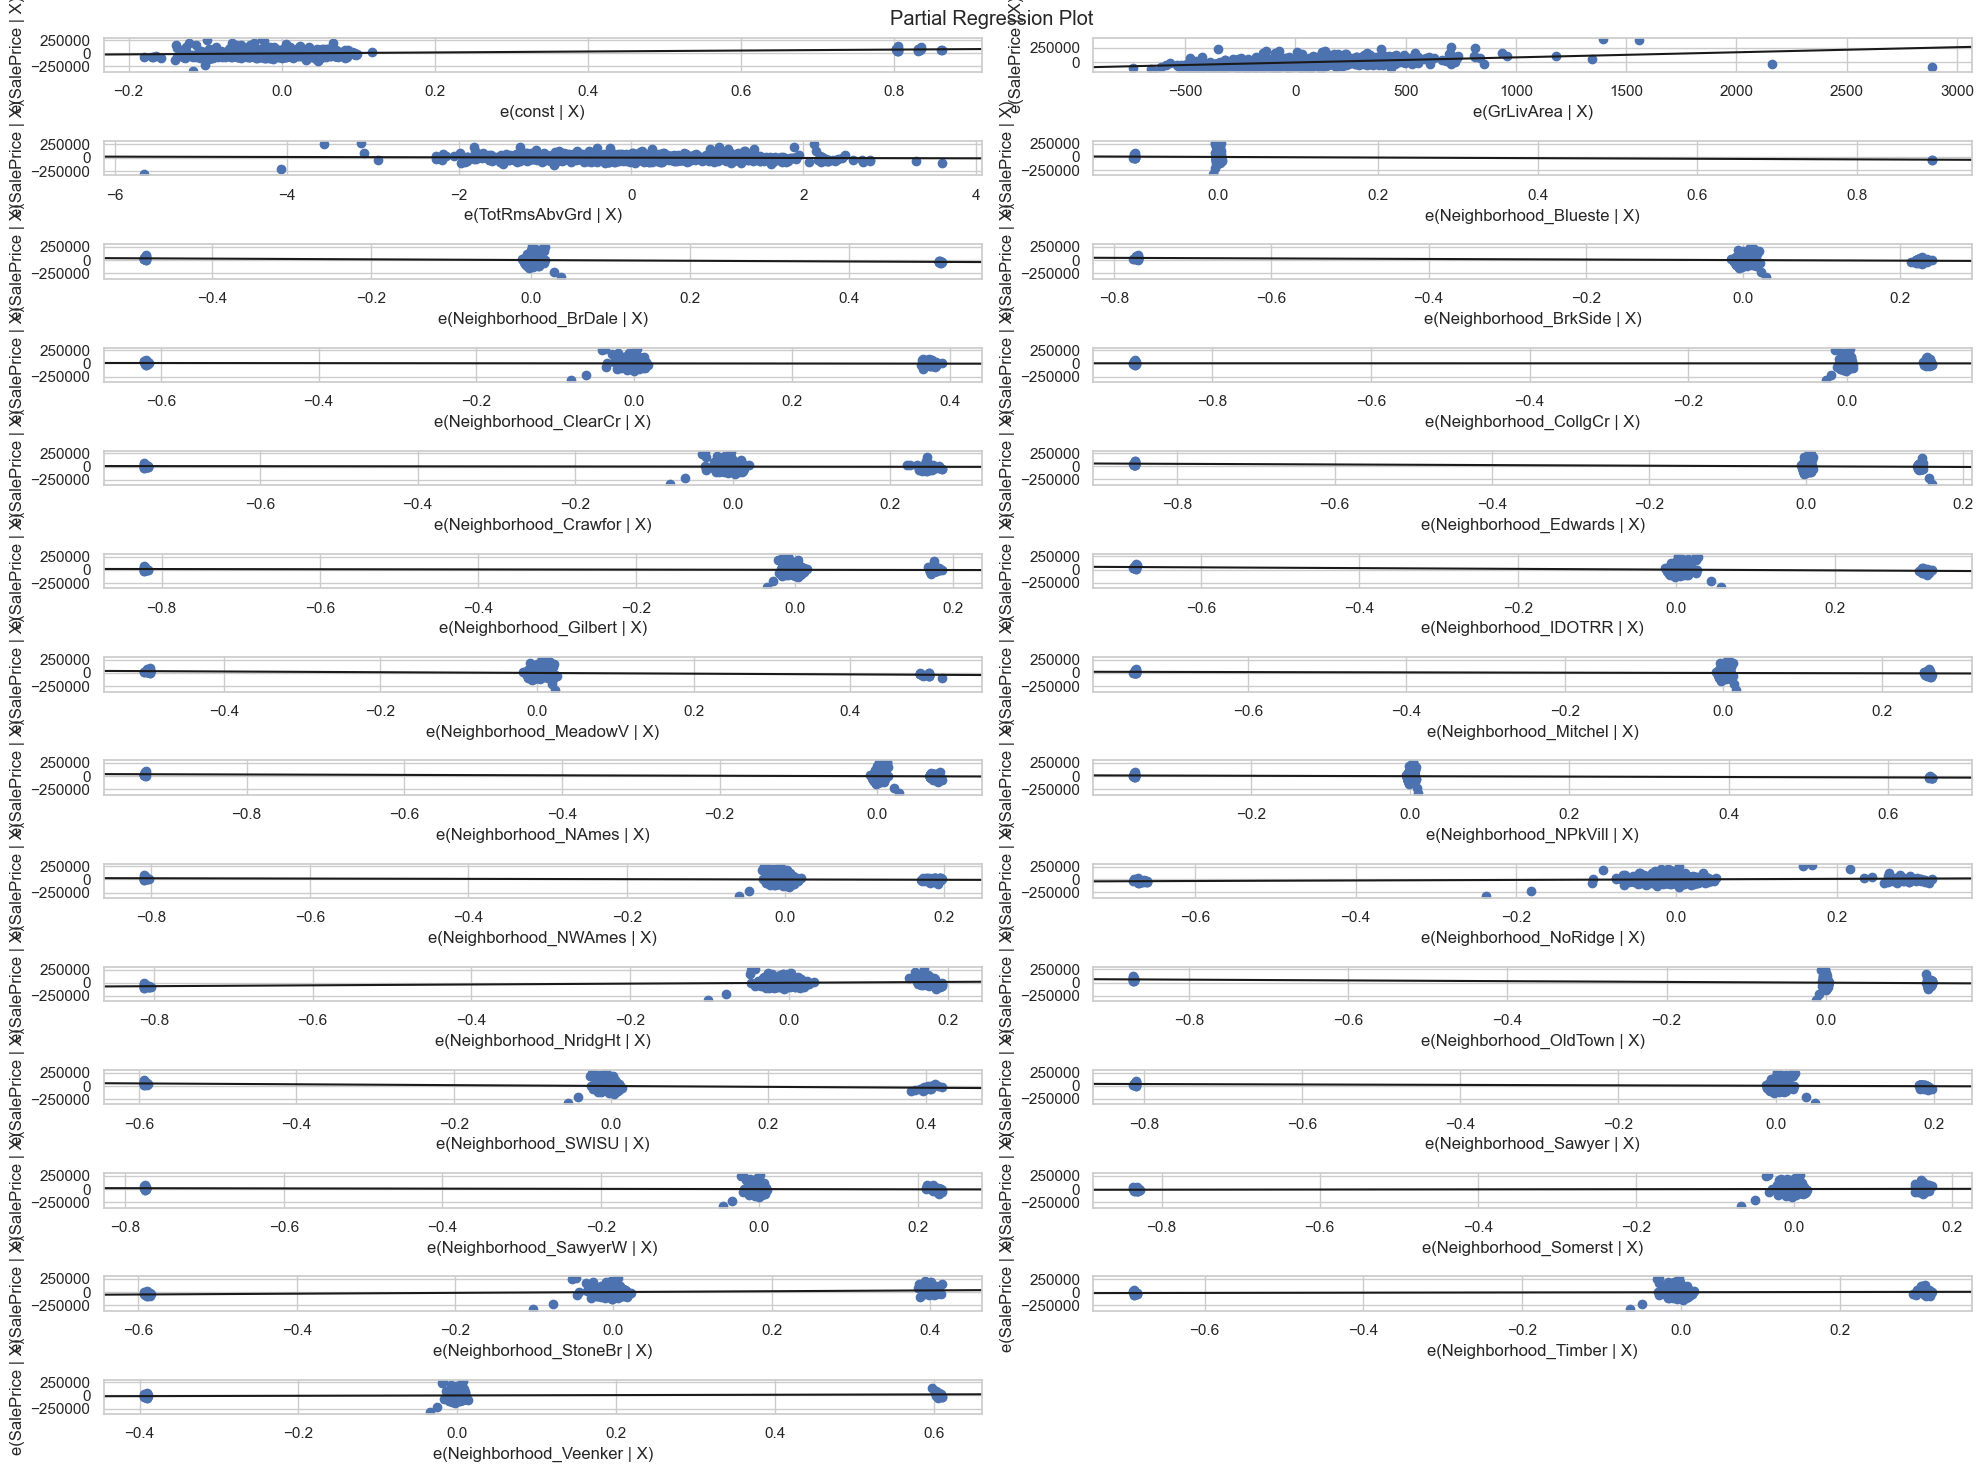

In [23]:
# Now create partial regression plots
fig = plt.figure(figsize=(20, 15))
sm.graphics.plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [28]:
# Your answer here

# Model Insights

# Predictors Used:
# - GrLivArea (continuous numeric)
# - TotRmsAbvGrd (discrete numeric)
# - Neighborhood (categorical, one-hot encoded)

# R^2 Score:
# - The R^2 score indicates how much variance in SalePrice is explained by our predictors.
# - A reasonably high score (e.g., ~0.7–0.8) suggests a good start, but there's room for improvement.

# Partial Regression Plots:
# - GrLivArea shows a strong, positive linear relationship with SalePrice.
# - TotRmsAbvGrd has a weaker effect but still trends positively.
# - Neighborhood dummy variables show varied effects, supporting location's influence.

#  Limitations:
# - Possible multicollinearity among dummy variables
# - Omitted variables like YearBuilt, OverallQual
# - Linearity assumption may not hold

#  Next Steps:
# 1. Add more relevant features (YearBuilt, OverallQual, etc.)
# 2. Log-transform SalePrice and skewed predictors
# 3. Use Ridge/Lasso or tree-based models (Random Forest, XGBoost)
# 4. Evaluate using k-fold cross-validation

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [29]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
ames = pd.read_csv('ames.csv', index_col=0)
ames_clean = ames.dropna(axis=1)

# Features and target
X = ames_clean[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = ames_clean['SalePrice']

# Define numeric and categorical columns
numeric_features = ['GrLivArea', 'TotRmsAbvGrd']
categorical_features = ['Neighborhood']

# Build a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"[scikit-learn] Mean Squared Error: {mse:.2f}")
print(f"[scikit-learn] R^2 Score: {r2:.4f}")

[scikit-learn] Mean Squared Error: 1847169924.30
[scikit-learn] R^2 Score: 0.7592


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.